In [1]:
import os
from collections import defaultdict
from functools import partial
from copy import deepcopy

from cmp import run_programs
from matplotlib import pyplot as plt
import numpy as np

ldict = partial(defaultdict, list)

In [2]:
results = run_programs(['sum'])

{'data': [('c++', 0.005427615706985061, ['100000']),
          ('c++', 0.006259427964687347, ['600000']),
          ('c++', 0.007207309599402997, ['1100000']),
          ('c++', 0.007945121280730718, ['1600000']),
          ('c++', 0.008821619184393632, ['2100000']),
          ('cython', 0.03303104831326392, ['100000']),
          ('cython', 0.06496815383434296, ['600000']),
          ('cython', 0.09621212699196556, ['1100000']),
          ('cython', 0.13446030020713806, ['1600000']),
          ('cython', 0.16509863308497838, ['2100000']),
          ('cython_with_types', 0.03226007184674663, ['100000']),
          ('cython_with_types', 0.07178616523742676, ['600000']),
          ('cython_with_types', 0.10817983150482177, ['1100000']),
          ('cython_with_types', 0.1412331461906433, ['1600000']),
          ('cython_with_types', 0.17652436097462973, ['2100000']),
          ('java', 0.08035736817580003, ['100000']),
          ('java', 0.0820929637322059, ['600000']),
          ('java'

In [3]:
def group_results(results):
    results = deepcopy(results)
    for program_results in results:
        groupped_results = ldict()
        for compiler, time, arg in program_results['data']:
            groupped_results[compiler].append((int(arg[0]), time))

        for value in groupped_results.values():
            value.sort()
        program_results['data'] = dict(groupped_results)
        
    return results
groupped_results = group_results(results)
groupped_results

[{'program': 'sum',
  'data': {'c++': [(100000, 0.005427615706985061),
    (600000, 0.006259427964687347),
    (1100000, 0.007207309599402997),
    (1600000, 0.007945121280730718),
    (2100000, 0.008821619184393632)],
   'cython': [(100000, 0.03303104831326392),
    (600000, 0.06496815383434296),
    (1100000, 0.09621212699196556),
    (1600000, 0.13446030020713806),
    (2100000, 0.16509863308497838)],
   'cython_with_types': [(100000, 0.03226007184674663),
    (600000, 0.07178616523742676),
    (1100000, 0.10817983150482177),
    (1600000, 0.1412331461906433),
    (2100000, 0.17652436097462973)],
   'java': [(100000, 0.08035736817580003),
    (600000, 0.0820929637322059),
    (1100000, 0.08286545826838566),
    (1600000, 0.08277076941270095),
    (2100000, 0.0836600661277771)],
   'lisp': [(100000, 0.015876701899937222),
    (600000, 0.020740776645893952),
    (1100000, 0.02614591671870305),
    (1600000, 0.030286676743451285),
    (2100000, 0.0349776004922801)],
   'nuitka': [(1000

In [4]:
def plot_result(program, data):
    plt.title('program: %s' % program)

    if len(data) == 1:
        plt.barh([d[0] for d in data], width=[d[1] for d in data], color=[colors[d[0]] for d in data], )
        plt.xlabel('seconds')
        plt.tight_layout()
    else:
        print(data)
        for executor, values in data.items():  
            x, y = np.array(values).T
            plt.plot(x, y, label=executor, color=colors[executor])
        plt.legend() 
    plt.savefig(os.path.join('etc/img/', '%s.png' % program))
    plt.show()

In [5]:
colors = {
    "python": "#008b8b",
    "python2": "#004b4b",
    "pypy2": "#303b3b",
    "nuitka": "#7fff00",
    "cython": "#ffa500",
    "cython_with_types": "#ef9500",
    "c++": "pink",
    "java": "brown",
    "lisp": "cyan",
    "clisp": "cyan",
}

{'c++': [(100000, 0.005427615706985061), (600000, 0.006259427964687347), (1100000, 0.007207309599402997), (1600000, 0.007945121280730718), (2100000, 0.008821619184393632)], 'cython': [(100000, 0.03303104831326392), (600000, 0.06496815383434296), (1100000, 0.09621212699196556), (1600000, 0.13446030020713806), (2100000, 0.16509863308497838)], 'cython_with_types': [(100000, 0.03226007184674663), (600000, 0.07178616523742676), (1100000, 0.10817983150482177), (1600000, 0.1412331461906433), (2100000, 0.17652436097462973)], 'java': [(100000, 0.08035736817580003), (600000, 0.0820929637322059), (1100000, 0.08286545826838566), (1600000, 0.08277076941270095), (2100000, 0.0836600661277771)], 'lisp': [(100000, 0.015876701899937222), (600000, 0.020740776645893952), (1100000, 0.02614591671870305), (1600000, 0.030286676743451285), (2100000, 0.0349776004922801)], 'nuitka': [(100000, 0.06005372720606187), (600000, 0.08879741032918294), (1100000, 0.11805007192823622), (1600000, 0.14656026022774832), (210

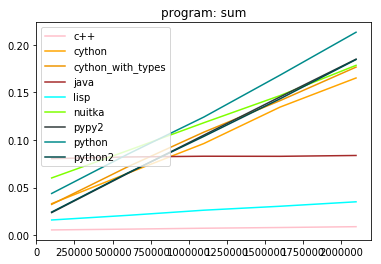

In [6]:
for result in groupped_results:
    plot_result(**result)